<a href="https://colab.research.google.com/github/Guptarohit2003/Machine-Learning/blob/main/Tensorflow/01_neural_network_regression_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural networks in TensorFlow

In [178]:
import tensorflow as tf
tf.__version__

'2.15.0'

# Create Data view and fit

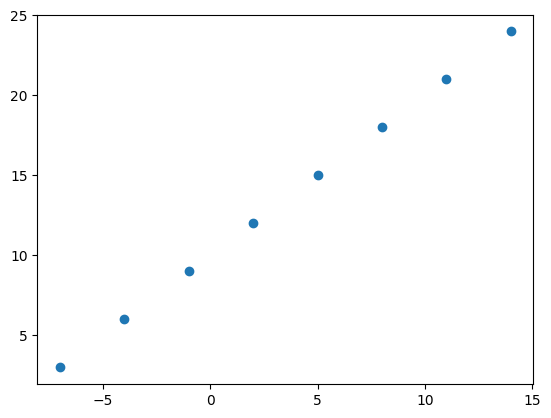

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Create Feature
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [180]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input Output Shapes

In [181]:
#create demo tensor for house prediction
house_info = tf.constant(["bedroom", "bathroom", 'garage'])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [182]:
X[0], y[0]

(-7.0, 3.0)

In [183]:
X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Create a model
2. Compile a model
3. Fitting a model

In [184]:
 tf.random.set_seed(42)

 # Create a model
 model = tf.keras.Sequential()

 model.add(tf.keras.layers.Dense(1))

 # Compile the model
 model.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics=['mae'])

 # Fit the model
 model.fit(tf.expand_dims(X, axis = -1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 332ms/step - loss: 12.0152 - mae: 12.0152
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.8827 - mae: 11.8827
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.7502 - mae: 11.7502
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.6177 - mae: 11.6177
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 11.4852 - mae: 11.4852


In [185]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [186]:
model.predict([17.0])

1/1 [==============================] - 0s 60ms/step


array([[10.236835]], dtype=float32)

## Improve our model

We can improve our model, by altering the steps we took to create a model

**Creating a model** : here we might add more layers, increase # hidden units (neurons) within each of the hidden layers, change the activation function of each layer.

**Compiling a model** : here we might change the optimization function or perhaps the **learning rate** of the optimization function.

**Fitting a model** : here we might fit a model for more **epochs** or on more data.

In [187]:
# Let's rebuild the model for improvement
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

model.compile(loss = "mae",
              optimizer = "sgd",
              metrics = ["mae"])

# Fit the model (modified)
model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 321ms/step - loss: 16.5421 - mae: 16.5421
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 16.2609 - mae: 16.2609
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 15.9796 - mae: 15.9796
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 15.6984 - mae: 15.6984
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 15.4171 - mae: 15.4171
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 15.1359 - mae: 15.1359
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 14.8806 - mae: 14.8806
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 14.7481 - mae: 14.7481
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 14.6156 - mae: 14.6156
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 14.4831 - mae: 14.4831
Epoch 11/100
1/1 [==============================] - 0s

In [188]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [189]:
model.predict([17.0])

1/1 [==============================] - 0s 64ms/step


array([[29.675692]], dtype=float32)

In [190]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= 'mae',
               optimizer = 'sgd',
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 547ms/step - loss: 13.8423 - mae: 13.8423
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2347 - mae: 13.2347
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6546 - mae: 12.6546
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.0779 - mae: 12.0779
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4838 - mae: 11.4838
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8403 - mae: 10.8403
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0825 - mae: 10.0825
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.1749 - mae: 9.1749
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.0219 - mae: 8.0219
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.5042 - mae: 6.5042
Epoch 11/100
1/1 [==============================] - 0s 8ms/s

In [191]:
model.predict([17.0])

1/1 [==============================] - 0s 119ms/step


array([[29.087812]], dtype=float32)

In [192]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 855ms/step - loss: 13.7156 - mae: 13.7156
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.6806 - mae: 13.6806
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6460 - mae: 13.6460
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6113 - mae: 13.6113
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.5767 - mae: 13.5767
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.5421 - mae: 13.5421
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 13.5077 - mae: 13.5077
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4737 - mae: 13.4737
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 13.4399 - mae: 13.4399
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4062 - mae: 13.4062
Epoch 11/100
1/1 [==============================] - 

In [193]:
model.predict([17.0])

1/1 [==============================] - 0s 87ms/step


array([[9.08383]], dtype=float32)

In [194]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(50, activation = None),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 958ms/step - loss: 12.0521 - mae: 12.0521
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3802 - mae: 11.3802
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6977 - mae: 10.6977
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0021 - mae: 10.0021
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.2908 - mae: 9.2908
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 8.5616 - mae: 8.5616
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.8125 - mae: 7.8125
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 7.0416 - mae: 7.0416
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8127 - mae: 6.8127
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.1814 - mae: 7.1814
Epoch 11/100
1/1 [==============================] - 0s 8ms/step -

In [195]:
model.predict([17.0])

1/1 [==============================] - 0s 72ms/step


array([[26.629456]], dtype=float32)

## Evaluating a model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it.......
```



When it comes to evaluation. we have to do

> Visualization

It's a good idea to visualize:

* The data - what data are we working with ? what does it looks like?
* The model itself - what does our model looks like?
* The training of model - how does a model perform while it learns?
* The prediction of the model - how do the predictions of a model line up against the ground truth.

In [196]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [197]:
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

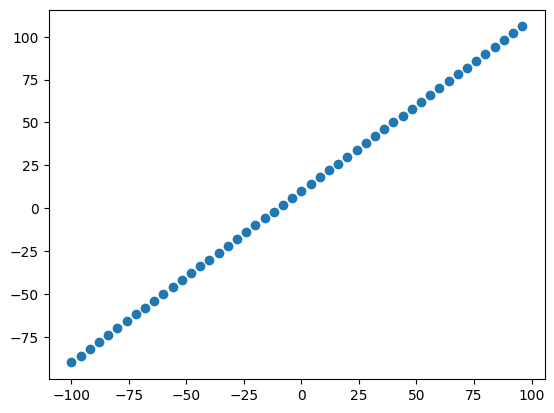

In [198]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### 3 sets

* Training set - the model learns from this data, which is around 79-80% of total data
* Valdation set - the model gets tuned on this data, which is around 10-15% of total data
* Test set - the model gets evaluated on this data, which is typically 10- 15% of total data


In [199]:
X_train = X[:40]
X_test = X[40:]

In [200]:
y_train = y[:40]
y_test = y[40:]

In [201]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### visualizing the data

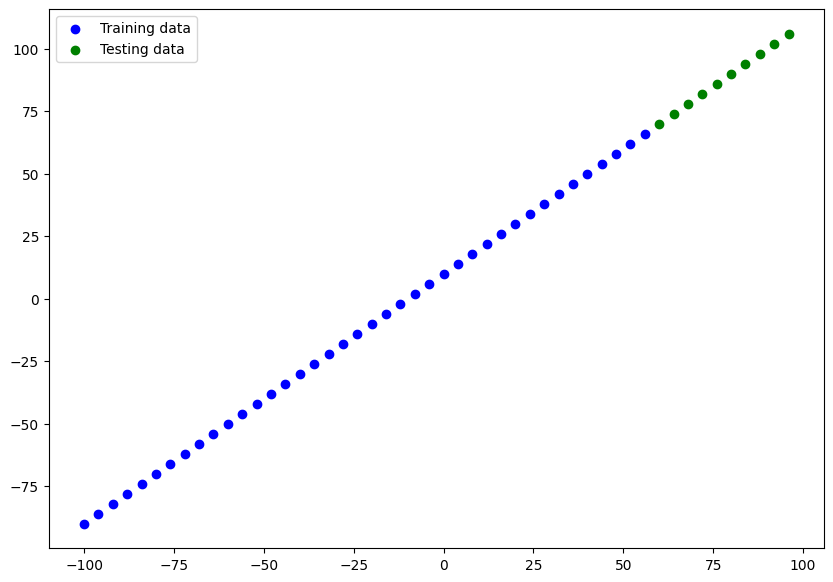

In [202]:
plt.figure(figsize = (10, 7))

plt.scatter(X_train, y_train, c = 'b', label = 'Training data')

plt.scatter(X_test, y_test, c = 'g', label = 'Testing data')

plt.legend()

In [203]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.losses.mae,
              optimizer = tf.optimizers.SGD(),
              metrics = ['mae'])

# model.fit(X_train, y_train, epochs = 100)

In [204]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [205]:
 tf.random.set_seed(42)

 model = tf.keras.Sequential([
     tf.keras.layers.Dense(10, input_shape = [1],name='input_layer'),
     tf.keras.layers.Dense(1, name = 'output_layer')
 ], name = "Model_1")

 model.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

In [206]:
# model = tf.keras.Sequential([
#      tf.keras.layers.Dense(50, activation = None),
#      tf.keras.layers.Dense(1)
#  ])


# model.compile(loss= tf.keras.losses.mae,
#                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
#                metrics=["mae"])

# model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

In [207]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [208]:
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [209]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


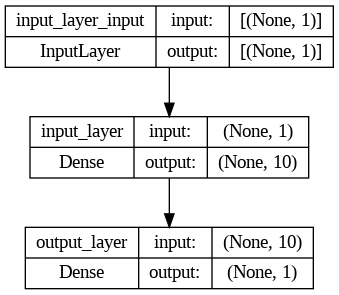

In [210]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

## Visualize our Model's prediction

In [211]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 53ms/step


array([[ 76.436424],
       [ 81.4179  ],
       [ 86.39939 ],
       [ 91.380875],
       [ 96.36236 ],
       [101.34384 ],
       [106.325325],
       [111.30681 ],
       [116.28829 ],
       [121.26977 ]], dtype=float32)

In [212]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [213]:
model.predict([17.0])

1/1 [==============================] - 0s 74ms/step


array([[22.885483]], dtype=float32)

In [214]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c= "b", label = "training Data")

  plt.scatter(test_data, test_labels, c = 'g', label = "testing Data")

  plt.scatter(test_data, predictions, c = 'r', label = "Predictions")

  plt.legend

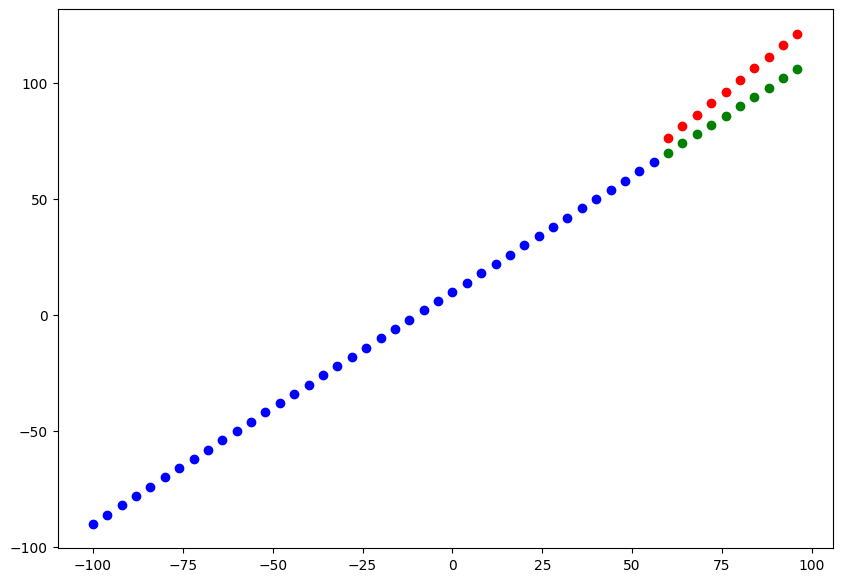

In [215]:
plot_predictions()

### Evaluating using regression evaluation metrics

In [216]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 108ms/step - loss: 10.8531 - mae: 10.8531


[10.85309886932373, 10.85309886932373]

In [217]:
# Ca;culate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true= y_test,
                                     y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.338145, 11.03284 , 10.      , 10.276175, 11.744944, 14.406305,
       18.325325, 23.306808, 28.288294, 33.269768], dtype=float32)>

In [218]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.436424],
       [ 81.4179  ],
       [ 86.39939 ],
       [ 91.380875],
       [ 96.36236 ],
       [101.34384 ],
       [106.325325],
       [111.30681 ],
       [116.28829 ],
       [121.26977 ]], dtype=float32)>

In [219]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [220]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.436424,  81.4179  ,  86.39939 ,  91.380875,  96.36236 ,
       101.34384 , 106.325325, 111.30681 , 116.28829 , 121.26977 ],
      dtype=float32)>

In [221]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.853098>

In [222]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=125.737045>

In [223]:
def MAE(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def MSE(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Model Improvement

1. Get more Data
2. Make model Larger.
3. Train for Longer

In [224]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

3 modelling Experiments

1. `model_1` = same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` = 2 layers, trained for 100 epochs.
3. `model_3` = 2 layers, trained for 500 epochs

In [225]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 50.9106 - mae: 50.9106
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 17.9345 - mae: 17.9345
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 16.8240 - mae: 16.8240
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0911 - mae: 9.0911
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0517 - mae: 11.0517
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 10.2099 - mae: 10.2099
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2238 - mae: 9.2238
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.1560 - mae: 9.1560
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 11.7728 - mae: 11.7728
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 13.6953 - mae: 13.6953
Epoch 11/100
2/2 [==============================] - 0s 7ms/step

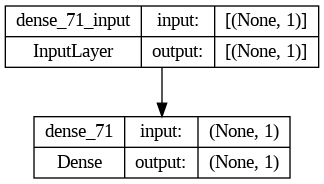

In [226]:
from tensorflow.keras.utils import plot_model
plot_model(model_1,show_shapes=True)

In [227]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 43ms/step


array([[56.54779 ],
       [60.23185 ],
       [63.91591 ],
       [67.59997 ],
       [71.284035],
       [74.968094],
       [78.65215 ],
       [82.33622 ],
       [86.02028 ],
       [89.70434 ]], dtype=float32)

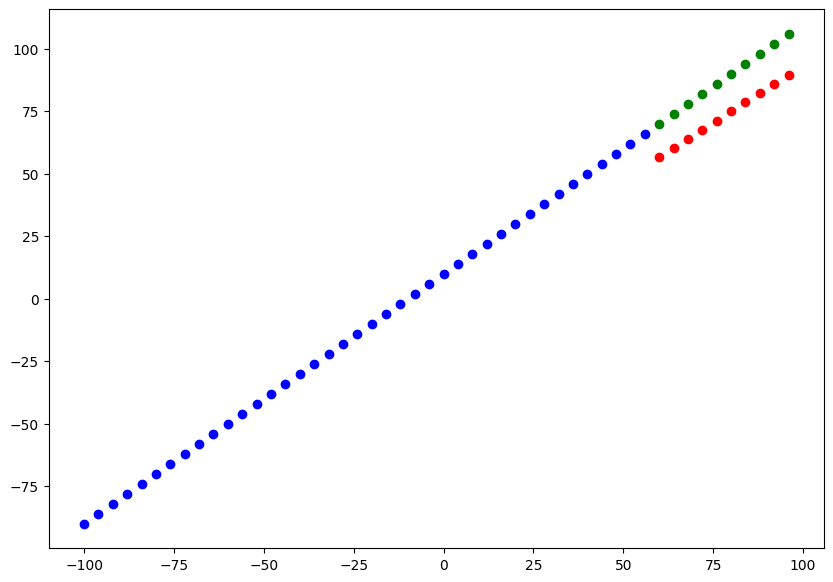

In [228]:
plot_predictions(predictions=y_pred_1)

In [229]:
mae_1 = MAE(y_true=y_test, y_pred=y_pred_1)
mse_1 = MSE(y_true = y_test, y_pred=y_pred_1)

### `model_2`

In [230]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape = [1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 17.4983 - mae: 17.4983
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.6315 - mae: 24.6315
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 28.7408 - mae: 28.7408
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 16.4217 - mae: 16.4217
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 19.2329 - mae: 19.2329
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 12.8626 - mae: 12.8626
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.1005 - mae: 12.1005
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9286 - mae: 10.9286
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 38.1158 - mae: 38.1158
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 25.6871 - mae: 25.6871
Epoch 11/100
2/2 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 55ms/step


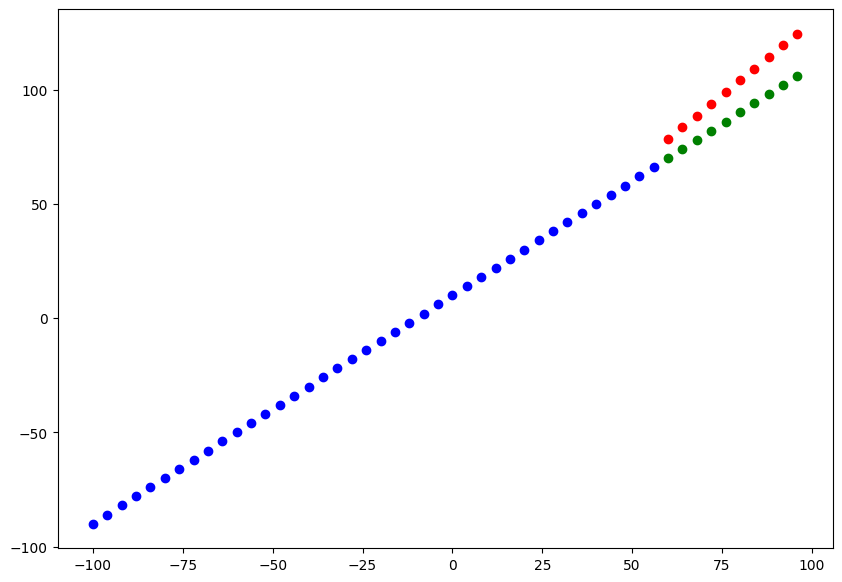

In [231]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [232]:
mae_2 = MAE(y_test, y_pred_2)

In [233]:
mse_2 = MSE(y_test, y_pred_2)

### `model_3`

In [234]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape = [1]),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 55.8754 - mae: 55.8754
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 29.2022 - mae: 29.2022
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 32.5491 - mae: 32.5491
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 17.2947 - mae: 17.2947
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 23.2687 - mae: 23.2687
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1399 - mae: 11.1399
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 12.2060 - mae: 12.2060
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 10.9974 - mae: 10.9974
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 38.6500 - mae: 38.6500
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 26.1366 - mae: 26.1366
Epoch 11/500
2/2 [==============================] - 0s 6ms

1/1 [==============================] - 0s 99ms/step


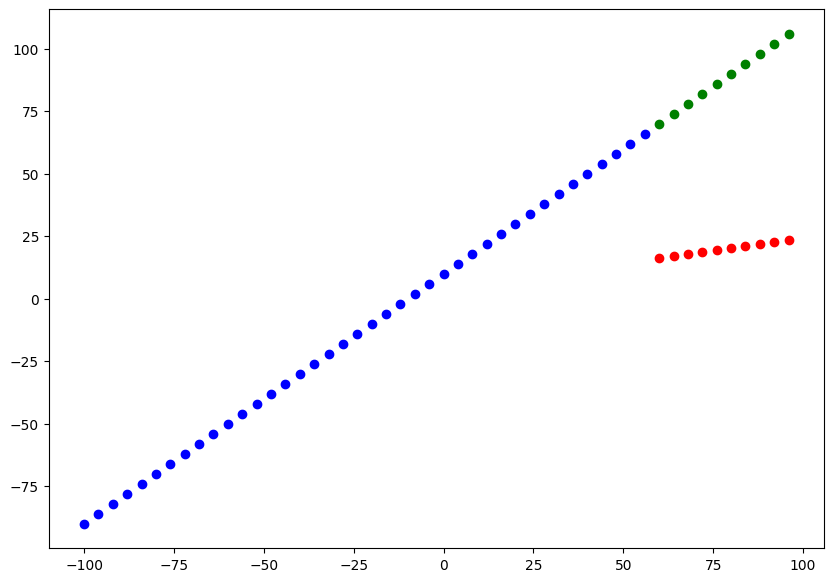

In [235]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [236]:
mae_3 = MAE(y_test, y_pred_3)
mse_3 = MSE(y_test, y_pred_3)

## COmpanring the results of experiments

In [237]:
import pandas as pd

model_list = [['model_1', mae_1.numpy(), mse_1.numpy()],
              ['model_2', mae_2.numpy(), mse_2.numpy()],
              ['model_3', mae_3.numpy(), mse_3.numpy()]]

In [238]:
pd.DataFrame(model_list, columns=['model_name', 'mae', 'mse'])

,model_name,mae,mse
0,model_1,14.873937,222.057465
1,model_2,13.397720,189.626312
2,model_3,67.915154,4696.825684


In [239]:
model_2.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 10)                20        
                                                                 
 dense_73 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking our experiments

One really good habit in machine Learning modelling is to track the result of your experiments.

**Resources:** As you build more models. you'll want to look into using.
* Tensorboarrd
* Weights and Biases

## Save our model

There are two formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [240]:
model_2.save("Best_model_SavedModel_format")

In [241]:
model_2.save("Best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [242]:
# Load model
loaded_SavedModel_format = tf.keras.models.load_model('/content/Best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 10)                20        
                                                                 
 dense_73 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [243]:
model_2.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 10)                20        
                                                                 
 dense_73 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [244]:
# Comparing predictions
model_2_pred = model_2.predict(X_test)
loaded_SavedModel_format_pred = loaded_SavedModel_format.predict(X_test)
model_2_pred == loaded_SavedModel_format_pred

1/1 [==============================] - 0s 93ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [245]:
model_2_pred, loaded_SavedModel_format_pred

(array([[ 78.41192 ],
        [ 83.519875],
        [ 88.62783 ],
        [ 93.73579 ],
        [ 98.84374 ],
        [103.9517  ],
        [109.05965 ],
        [114.16761 ],
        [119.275566],
        [124.38352 ]], dtype=float32),
 array([[ 78.41192 ],
        [ 83.519875],
        [ 88.62783 ],
        [ 93.73579 ],
        [ 98.84374 ],
        [103.9517  ],
        [109.05965 ],
        [114.16761 ],
        [119.275566],
        [124.38352 ]], dtype=float32))

In [246]:
loaded_h5_model = tf.keras.models.load_model('/content/Best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 10)                20        
                                                                 
 dense_73 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [247]:
loaded_h5_model_pred = loaded_h5_model.predict(X_test)
model_2_pred == loaded_h5_model_pred

1/1 [==============================] - 0s 113ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A larger Example

In [248]:
import pandas as pd

In [249]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [250]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [251]:
# Create X and y
y = insurance_one_hot['charges']
X = insurance_one_hot.drop('charges', axis = 1)

In [252]:
X,y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [253]:
# Creating training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [254]:
# BUild neural Network
tf.random.set_seed(42)


insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8566.9434 - mae: 8566.9434
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7870.7656 - mae: 7870.7656
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7575.8423 - mae: 7575.8423
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7872.5195 - mae: 7872.5195
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7703.6470 - mae: 7703.6470
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7601.6094 - mae: 7601.6094
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7593.2251 - mae: 7593.2251
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7788.2695 - mae: 7788.2695
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7612.3926 - mae: 7612.3926
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7723.9199 - mae: 7723.9199

In [255]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6960.8511 - mae: 6960.8511


[6960.85107421875, 6960.85107421875]

In [256]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [257]:
# Improving The model by increasing layer and changing optimizer
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13263.0830 - mae: 13263.0830
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13040.8408 - mae: 13040.8408
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12599.3896 - mae: 12599.3896
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11774.7002 - mae: 11774.7002
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10480.8906 - mae: 10480.8906
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 8980.1406 - mae: 8980.1406
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7815.6162 - mae: 7815.6162
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7450.8315 - mae: 7450.8315
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7401.9429 - mae: 7401.9429
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7382.2847 - mae:

In [258]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4610.5161 - mae: 4610.5161


[4610.51611328125, 4610.51611328125]

In [259]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6960.8511 - mae: 6960.8511


[6960.85107421875, 6960.85107421875]

In [260]:
# Model improvement by training for longer time
tf.random.set_seed(42)


insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

history = insurance_model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13303.1973 - mae: 13303.1973
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13170.5293 - mae: 13170.5293
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12878.7949 - mae: 12878.7949
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12270.9580 - mae: 12270.9580
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11201.6807 - mae: 11201.6807
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9754.5830 - mae: 9754.5830
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8350.2939 - mae: 8350.2939
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7591.6089 - mae: 7591.6089
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7441.2456 - mae: 7441.2456
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7418.4814 - mae:

In [261]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3492.6487 - mae: 3492.6487


[3492.648681640625, 3492.648681640625]

In [262]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6960.8511 - mae: 6960.8511


[6960.85107421875, 6960.85107421875]

Text(0.5, 0, 'epochs')

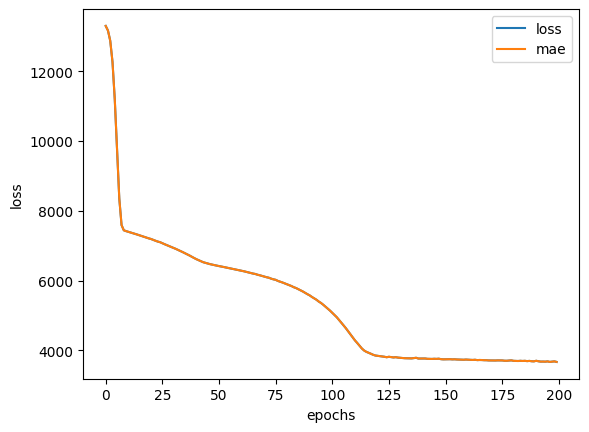

In [263]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

# Preprocessing Data (Normalization and Standardization)

In [264]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

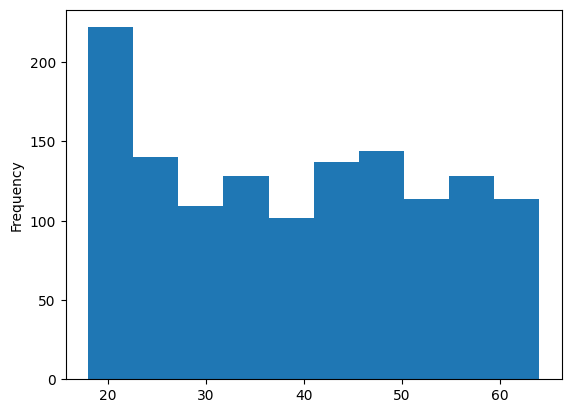

In [266]:
X['age'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

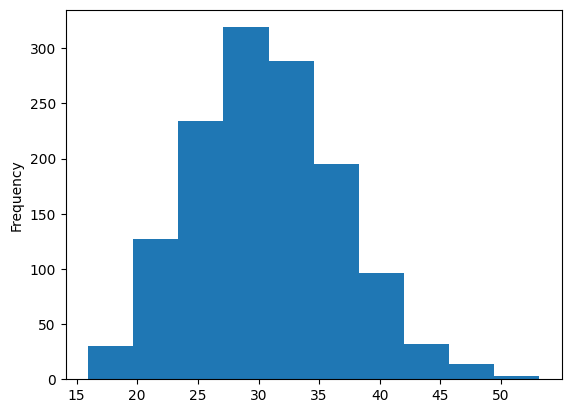

In [267]:
X['bmi'].plot(kind = 'hist')

In [270]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [275]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(), ['sex','smoker', 'region'])
)
X = insurance.drop('charges', axis = 1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_normal = ct.fit_transform(X_train)
X_test_normal = ct.transform(X_test)

In [276]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [278]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [280]:
tf.random.set_seed(42)

insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

insurance_model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

insurance_model_1.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.4258 - mae: 13343.4258
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.8467 - mae: 13333.8467
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13310.1357 - mae: 13310.1357
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13261.2568 - mae: 13261.2568
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13175.5957 - mae: 13175.5957
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13041.6846 - mae: 13041.6846
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12849.4834 - mae: 12849.4834
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12589.1914 - mae: 12589.1914
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12250.8369 - mae: 12250.8369
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11832.92

In [281]:
insurance_model_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3433.6306 - mae: 3433.6306


[3433.630615234375, 3433.630615234375]